# 2. Collisions

In [2]:
import math
from math import sqrt as sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class charged_particle:
    m=9.10938356e-31 #mass
    q=-1.60217662e-19 #charge
    x=np.zeros(3) #location
    v=np.zeros(3) #speed

In [5]:
def binary_Coulomb_collision(charged_particle_0,charged_particle_1,time_frame,n_steps):
    loc=np.zeros((3,n_steps,2))
    loc[:,0,0]=charged_particle_0.x
    loc[:,0,1]=charged_particle_1.x
    v_old=np.zeros((3,2))
    v_old[:,0]=charged_particle_0.v
    v_old[:,1]=charged_particle_1.v
    v_new=np.zeros((3,2))
    dt=(time_frame[1]-time_frame[0])/n_steps
    for i in range(1,n_steps,1):
        R=loc[:,0,0]-loc[:,0,1]
        r=np.linalg.norm(R)
        F=1/(4*np.pi*8.85e-12)*charged_particle_0.q*charged_particle_1.q/r**2*R/r
        v_new[:,0]=F/charged_particle_0.m*dt+v_old[:,0]
        v_new[:,1]=-F/charged_particle_1.m*dt+v_old[:,1]
        loc[:,i,:]=v_new*dt+loc[:,i-1,:] #new position
        v_old=v_new
    return loc

In [6]:
def plot_2D(r,n_interpolated=1,plot_size=3,plot_axes='axes'):
    n = len(r[0,:,0])
    k = n_interpolated
    x_interpolated_0 = np.interp(np.arange(n * k), np.arange(n) * k, r[0,:,0])
    y_interpolated_0 = np.interp(np.arange(n * k), np.arange(n) * k, r[1,:,0])
    x_interpolated_1 = np.interp(np.arange(n * k), np.arange(n) * k, r[0,:,1])
    y_interpolated_1 = np.interp(np.arange(n * k), np.arange(n) * k, r[1,:,1])
    fig, ax = plt.subplots(1, 1, figsize=(plot_size, plot_size))
    # Now, we draw our points with a gradient of colors.
    ax.scatter(x_interpolated_0, y_interpolated_0, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.jet,)
    ax.scatter(x_interpolated_1, y_interpolated_1, c=range(n*k), linewidths=0,
               marker='o', s=2*plot_size, cmap=plt.cm.viridis,)
    ax.axis('equal')
    if (plot_axes!="axes"):
        ax.set_axis_off()
    else:
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")

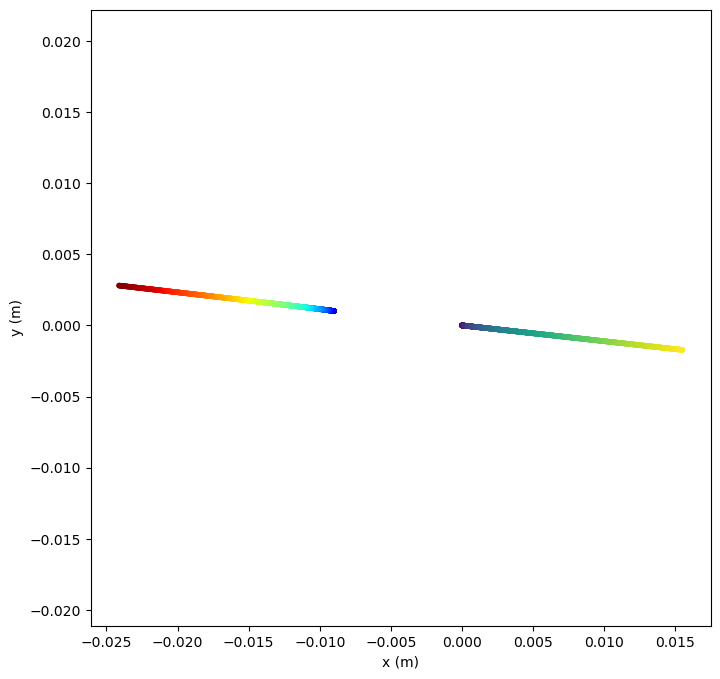

In [7]:
cp1=charged_particle()
cp1.x=np.array([-9e-3,1e-3,0])
cp1.v=np.array([2,1,0])
cp2=charged_particle()
cp2.q=-1.6e-19
cp2.m=9e-31
time_frame=[0,1e-4]
n_steps=1000
r=binary_Coulomb_collision(cp1,cp2,time_frame,n_steps)
plot_2D(r,plot_size=8)

In [8]:
n_0=6e28
m_e=9.1e-31
epsilon_0=8.85e-12
e=1.6e-19
omega_e=(n_0*e**2/(epsilon_0*m_e))**0.5
print (omega_e)

1.3810305199653646e+16


In [9]:
lambda_light=3e8/omega_e
print(lambda_light*1e9,'nm')

21.722908774494268 nm


In [10]:
def plasma_oscillations(n_0,th,particles,time_frame,n_steps):
    loc=np.zeros((3,n_steps,len(particles)))
    v_old=np.zeros((3,len(particles)))
    for i in range(len(particles)):
        loc[:,0,i]=particles[i].x
        v_old[:,i]=particles[i].v
    v_new=np.zeros((3,len(particles)))
    dt=(time_frame[1]-time_frame[0])/n_steps
    for i in range(1,n_steps,1):
        for j in range(len(particles)):
            E=np.array([1/(4*np.pi*8.85e-12)*n_0*th*1.6e-19,0,0]) #electric field creating by a plane of positive charges
            if (loc[0,i-1,j]<0):
                E*=-1
            F=particles[j].q*E
            v_new[:,j]=F/particles[j].m*dt+v_old[:,j]
            loc[:,i,j]=v_new[:,j]*dt+loc[:,i-1,j] #new position
        v_old=v_new
    return loc

In [11]:
def plot_2D(r,n_interpolated=1,plot_size=3,plot_axes='axes'):
    n = len(r[0,:,0])
    k = n_interpolated
    fig, ax = plt.subplots(1, 1, figsize=(plot_size, plot_size))
    # Now, we draw our points with a gradient of colors.
    for i in range(len(r[0,0,:])):
        x_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, r[0,:,i])
        y_interpolated = np.interp(np.arange(n * k), np.arange(n) * k, r[1,:,i])
        ax.scatter(x_interpolated, y_interpolated, c=range(n*k), linewidths=0,
                   marker='o', s=2*plot_size, cmap=plt.cm.jet,)
    #compute autoscale parameters
    xc=(r[0,:,:].max()+r[0,:,:].min())/2.
    x_low=xc-(r[0,:,:].max()-r[0,:,:].min())/2.*1.1
    x_high=xc+(r[0,:,:].max()-r[0,:,:].min())/2.*1.1
    yc=(r[1,:,:].max()+r[1,:,:].min())/2.
    y_low=yc-(r[1,:,:].max()-r[1,:,:].min())/2.*1.1
    y_high=yc+(r[1,:,:].max()-r[1,:,:].min())/2.*1.1
    #set autoscale parameters
    ax.set_xlim(min(x_low,y_low),max(x_high,y_high))
    ax.set_ylim(min(x_low,y_low),max(x_high,y_high))
    #ax.axis('equal') #or this can be used
    if (plot_axes!="axes"):
        ax.set_axis_off()
    else:
        plt.xlabel("x (m)")
        plt.ylabel("y (m)")

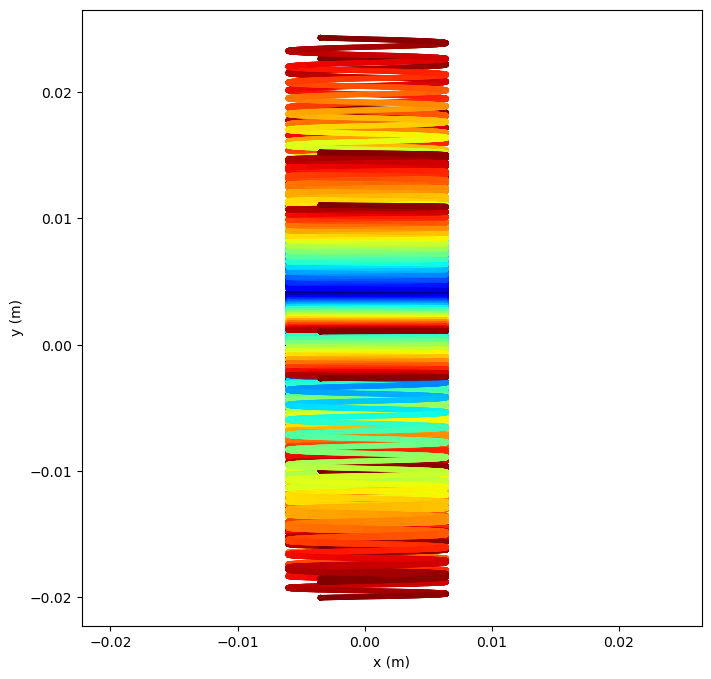

In [12]:
N=30
cp=np.empty(N,dtype=object)
sp=np.linspace(-4e-3,4e-3,N)
for i in range (N):
    cp[i]=charged_particle()
    cp[i].x=np.array([-6e-3,sp[i],0])
    cp[i].v=np.array([0,100000*(np.random.random_sample()-0.5),0])
time_frame=[0,50e-8]
n_steps=500
r=plasma_oscillations(1e19,1e-7,cp,time_frame,n_steps)
plot_2D(r,n_interpolated=20,plot_size=8)

In [13]:
m_e=9.1e-31
Z=1
e=1.6e-19
epsilon_0=8.85e-12
v_e=10000
n_i=1e19
sigma=(Z*e**2/(2*np.pi*epsilon_0*m_e*v_e**2))**2*np.pi
print(sigma,'m**2')
print(sigma*n_i*v_e*1e-12,'THz')

8.040827412502484e-11 m**2
8.040827412502484 THz


In [14]:
T_e=100 ##in eV
k=1.38e-23
e=1.6e-19
T_K=e*T_e/k #in K
print(T_K,'K')

1159420.2898550723 K


In [15]:
!pip install pyamg

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import pyamg
import scipy

In [17]:
class charged_particle:
    m=9.10938356e-31 #mass
    q=-1.60217662e-19 #charge
    x=0. #location
    y=0. #location
    vx=0. #speed
    vy=0. #speed

In [18]:
class grid_2D:
    Nx=10
    Ny=10
    x=np.zeros(Nx)
    y=np.zeros(Ny)
    data=np.zeros((Nx,Ny,2))

In [19]:
def charge_deposition(charged_particles,grid,tiny):
    charge_density=np.zeros((grid.Nx,grid.Ny))
    dist=np.zeros((2,2))
    val=np.zeros((2,2))
    dx=grid.x[1]-grid.x[0]
    dx=grid.y[1]-grid.y[0]
    for n in range (len(charged_particles)):
        ig=int((charged_particles[n].x-grid.x[0])/(grid.x[grid.Nx-1]-grid.x[0])*(grid.Nx-1))
        jg=int((charged_particles[n].y-grid.y[0])/(grid.y[grid.Ny-1]-grid.y[0])*(grid.Ny-1))
        if (ig>=grid.Nx-2):
            ig=grid.N_x-2
        if (jg>=grid.Ny-2):
            jg=grid.Ny-2
        for i in range (2):
            for j in range (2):
                dist[i,j]=sqrt((charged_particles[n].x-grid.x[ig+i])**2+(charged_particles[n].y-grid.y[jg+j])**2)
        ave=0
        for i in range (2):
            for j in range (2):
                val[i,j]=1./(dist[i,j]+tiny)
                ave+=val[i,j]
        for i in range (2):
            for j in range (2):
                charge_density[ig+i,jg+j]+=val[i,j]*charged_particles[n].q/ave
    return charge_density/8.85e-12/abs((grid.x[1]-grid.x[0])*(grid.y[1]-grid.y[0]))

In [20]:
def comp_E(charge_density,grid):
    Asize=len(charge_density[:,0])*len(charge_density[0,:])
    b=np.zeros(Asize)
    for i in range (len(charge_density[:,0])):
        for j in range (len(charge_density[0,:])):
            k=j+i*len(charge_density[0,:])
            b[k]=charge_density[i,j]
    stencil = [ [-1,-1,-1],[-1,8,-1],[-1,-1,-1] ]
    A = pyamg.gallery.stencil_grid(stencil, (len(charge_density[:,0]),len(charge_density[0,:])), dtype=float, format='csr')
    B = np.ones((A.shape[0],1))
    ml = pyamg.smoothed_aggregation_solver(A,B,max_coarse=10)
    #print (ml)
    residuals=[]
    x0 = scipy.rand(A.shape[0],1)
    x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals,accel='cg')
    #(residuals[-1]/residuals[0])**(1.0/len(residuals))
    solution=np.zeros((len(charge_density[:,0]),len(charge_density[0,:])))
    grid.data=np.zeros((len(charge_density[:,0]),len(charge_density[0,:]),2))
    for i in range (len(charge_density[:,0])):
        for j in range (len(charge_density[0,:])):
            k=j+i*len(charge_density[0,:])
            solution[i,j]=x[k]
    for i in range (1,len(charge_density[:,0])-1):
        for j in range (1,len(charge_density[0,:])-1):
            grid.data[i,j,1]=-(solution[i+1,j]-solution[i-1,j])/2.
            grid.data[i,j,0]=-(solution[i,j+1]-solution[i,j-1])/2.
    return solution

In [21]:
T_e=.1
n_e=1e19
m_e=9e-31
e=1.6e-19
v_e=sqrt(2*e*T_e/m_e)
omega_e=sqrt(n_e*e**2/(8.85e-12*m_e))
lambda_D=v_e/omega_e
length=8*lambda_D
dt=length/v_e/4
T=2*3.1416/omega_e
N=int(n_e**(1/3)*length)*10
time_frame=[0,25*T]
n_steps=int((time_frame[1]-time_frame[0])/dt)
print('v_e=',v_e,'m/s')
print('lambda_D=',lambda_D,'m')
print('T=',T,'s')
print('number of particles in the plane:',N,'x',N)
print('time step',dt)
print('number of cycles',n_steps)

v_e= 188561.80831641264 m/s
lambda_D= 1.0517841983981314e-06 m
T= 3.5047237478152256e-11 s
number of particles in the plane: 180 x 180
time step 1.1155856085482638e-11
number of cycles 78


In [22]:
box=np.array([-length,length,-length,length])*0.75
E_grid=grid_2D
E_grid.Nx=N
E_grid.Ny=N
E_grid.x=np.linspace(-length,length,N)
E_grid.y=np.linspace(-length*2,length,N)
E_grid.data=np.zeros((E_grid.Nx,E_grid.Ny,2))
rho_grid=grid_2D
rho_grid.Nx=N
rho_grid.Ny=N
rho_grid.x=np.linspace(-length,length,N)
rho_grid.y=np.linspace(-length,length,N)
rho_grid.data=np.zeros((rho_grid.Nx,rho_grid.Ny))
cp=np.empty(0,dtype=object)
l=0
Np=10000

for i in range (Np):
    cp=np.append(cp,charged_particle())
    cp[l].m=1.67e-27
    cp[l].x=box[0]+(box[1]-box[0])*np.random.random_sample()
    cp[l].y=box[2]+(box[3]-box[2])*np.random.random_sample()
    cp[l].q*=-1
    cp[l].vx=0
    cp[l].vy=0
    l+=1

for i in range (Np):
    cp=np.append(cp,charged_particle())
    rd=np.random.random_sample()
    vx=v_e/sqrt(2)*math.cos(2*math.pi*rd)
    vy=v_e/sqrt(2)*math.sin(2*math.pi*rd)
    cp[l].x=box[0]+(box[1]-box[0])*np.random.random_sample()
    cp[l].y=box[2]+(box[3]-box[2])*np.random.random_sample()
    cp[l].vx=vx
    cp[l].vy=vy
    l+=1

In [23]:
def comp_E(charge_density,grid):
    Asize=len(charge_density[:,0])*len(charge_density[0,:])
    b=np.zeros(Asize)
    for i in range (len(charge_density[:,0])):
        for j in range (len(charge_density[0,:])):
            k=j+i*len(charge_density[0,:])
            b[k]=charge_density[i,j]
    stencil = [ [-1,-1,-1],[-1,8,-1],[-1,-1,-1] ]
    A = pyamg.gallery.stencil_grid(stencil, (len(charge_density[:,0]),len(charge_density[0,:])), dtype=float, format='csr')
    B = np.ones((A.shape[0],1))
    ml = pyamg.smoothed_aggregation_solver(A,B,max_coarse=10)
    #print (ml)
    residuals=[]
    # Use numpy.random.rand instead of scipy.rand
    x0 = np.random.rand(A.shape[0],1) 
    x = ml.solve(b=b,x0=x0,tol=1e-10,residuals=residuals,accel='cg')
    #(residuals[-1]/residuals[0])**(1.0/len(residuals))
    solution=np.zeros((len(charge_density[:,0]),len(charge_density[0,:])))
    grid.data=np.zeros((len(charge_density[:,0]),len(charge_density[0,:]),2))
    for i in range (len(charge_density[:,0])):
        for j in range (len(charge_density[0,:])):
            k=j+i*len(charge_density[0,:])
            solution[i,j]=x[k]
    for i in range (1,len(charge_density[:,0])-1):
        for j in range (1,len(charge_density[0,:])-1):
            grid.data[i,j,1]=-(solution[i+1,j]-solution[i-1,j])/2.
            grid.data[i,j,0]=-(solution[i,j+1]-solution[i,j-1])/2.
    return solution

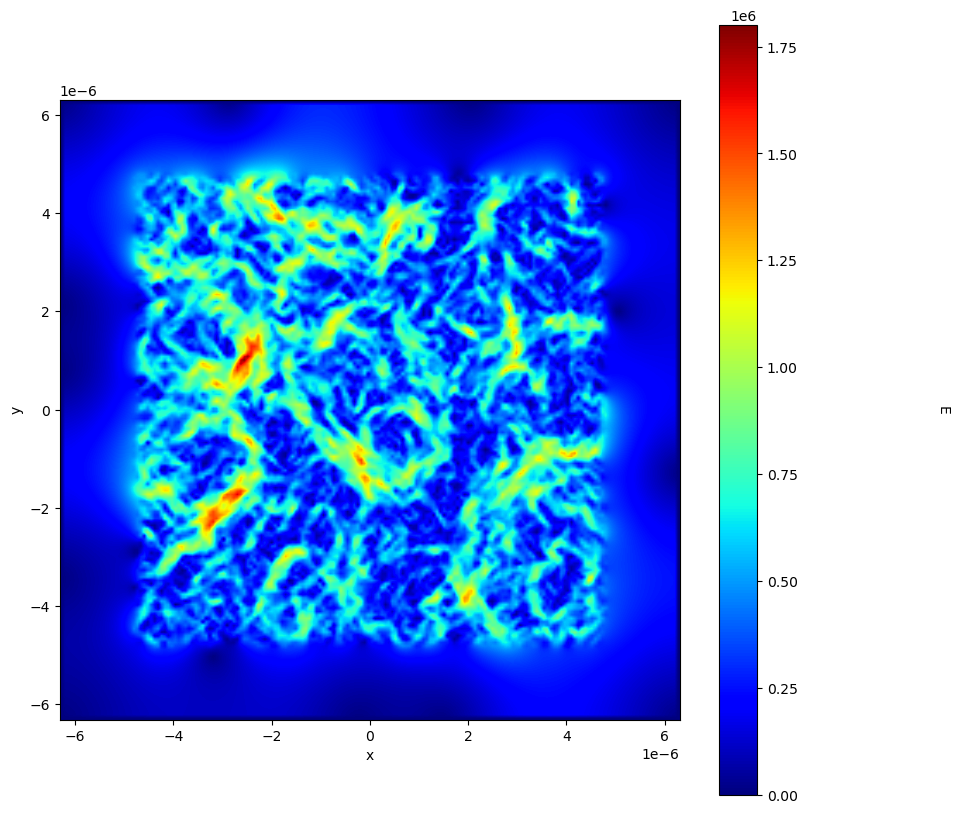

In [24]:
cd=charge_deposition(cp,E_grid,1e-5)
sol=comp_E(cd,E_grid)
fig, ax = plt.subplots(figsize=(10, 10))

im = plt.imshow(np.flip(np.flip(np.hypot(E_grid.data[:,:,0],E_grid.data[:,:,1]),0),1), cmap=plt.cm.jet, extent=box)
#im = plt.imshow(np.flip(np.flip(cd,0),1), cmap=plt.cm.jet, extent=box)
im.set_interpolation('bilinear')

cb = fig.colorbar(im)
plt.xlabel('x', rotation=0)
plt.ylabel('y', rotation=90)
cb.ax.set_ylabel('E', rotation=-90)
cb.ax.yaxis.set_label_coords(6, 0.5)
plt.show()